In [ ]:
# GRU

import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('covid1.csv')

In [ ]:
dataset.head()

,Date,Confirmed_cases
0,"24 January, 2020",0
1,"25 January, 2020",3
2,"26 January, 2020",4
3,"27 January, 2020",4
4,"28 January, 2020",4


In [ ]:
dataset.shape

(186, 2)

In [ ]:
covid1 = dataset['Confirmed_cases']
covid1.index = dataset['Date']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E57831BC8>],
      dtype=object)

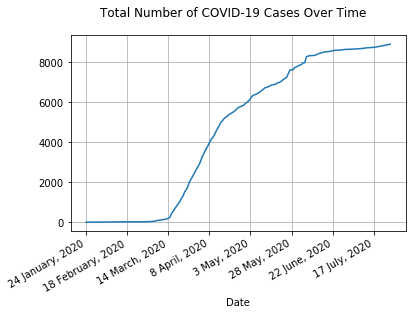

In [ ]:
covid1.plot(subplots=True, grid= True, title="Total Number of COVID-19 Cases Over Time")

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

In [ ]:
dataframe = read_csv('covid1.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

130 56


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Train on 115 samples, validate on 13 samples
Epoch 1/200
 - 2s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 2/200
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/200
 - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 6.9717e-04 - val_mean_squared_error: 6.9717e-04
Epoch 4/200
 - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 5/200
 - 0s - loss: 9.0890e-04 - mean_squared_error: 9.0890e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 6/200
 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 7/200
 - 0s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 1.7188e-04 - val_mean_squared_error: 1.7188e-04
Epoch 8/200
 - 0s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 4.8775e-04 - val_mean_squared_error: 4.8775e-04
Epoch 9/200

Epoch 70/200
 - 1s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 4.1305e-04 - val_mean_squared_error: 4.1305e-04
Epoch 71/200
 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 8.8686e-04 - val_mean_squared_error: 8.8686e-04
Epoch 72/200
 - 1s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 6.0805e-05 - val_mean_squared_error: 6.0805e-05
Epoch 73/200
 - 1s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 1.1198e-04 - val_mean_squared_error: 1.1198e-04
Epoch 74/200
 - 1s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 75/200
 - 1s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 9.7776e-05 - val_mean_squared_error: 9.7776e-05
Epoch 76/200
 - 1s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 2.8800e-04 - val_mean_squared_error: 2.8800e-04
Epoch 77/200
 - 1s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 78/200
 - 0s - loss: 8.522

Epoch 139/200
 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 140/200
 - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 141/200
 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 142/200
 - 0s - loss: 8.5045e-04 - mean_squared_error: 8.5045e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 143/200
 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 144/200
 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 145/200
 - 0s - loss: 3.4250e-04 - mean_squared_error: 3.4250e-04 - val_loss: 7.0880e-04 - val_mean_squared_error: 7.0880e-04
Epoch 146/200
 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 147/200
 - 0s - loss: 0.0040 - mean_square

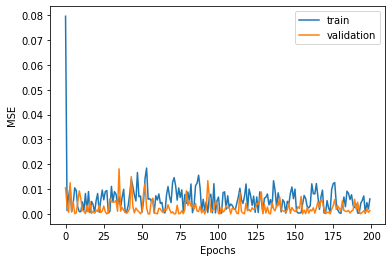

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(GRU(32, dropout=0.03, recurrent_dropout=0.03, return_sequences=True, input_shape=(1, look_back), name ="layer1"))
model.add(GRU(64, dropout=0.08, recurrent_dropout=0.07, return_sequences=True, activation='relu', name ="layer2"))
model.add(GRU(128, activation='relu', name ="layer3"))

model.add(Dense(1, activation = 'relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mean_squared_error']) #RMSProp
history = model.fit(trainX, trainY, validation_split=0.1, epochs=200, batch_size=1, verbose=2)

fig, ax = plt.subplots()

plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='validation')

plt.xlabel(xlabel ="Epochs")
plt.ylabel(ylabel ="MSE")

ax.legend()

plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 172.58 RMSE
Test Score: 545.40 RMSE


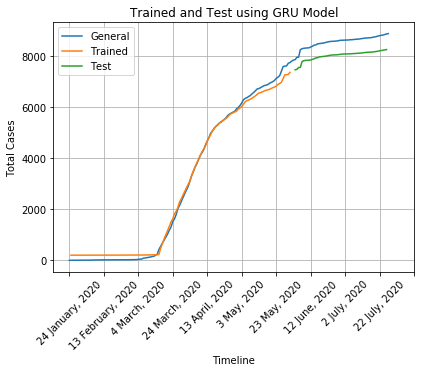

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

fig, ax = plt.subplots()

plt.plot(scaler.inverse_transform(dataset), label='General')
plt.plot(covid1.index, trainPredictPlot, label='Trained')
plt.plot(testPredictPlot, label='Test')

plt.tight_layout()
plt.xticks(rotation=45)
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

plt.xlabel(xlabel ="Timeline")
plt.ylabel(ylabel ="Total Cases")
plt.title("Trained and Test using GRU Model")

ax.legend()
plt.grid()
plt.show()

In [ ]:
mse_result = history.history['mean_squared_error']

In [ ]:
for number, result in enumerate(mse_result):
    print(number, result)

0 0.07958131
1 0.0014107944
2 0.007173938
3 0.011122604
4 0.00090890157
5 0.004242798
6 0.010537783
7 0.0094239
8 0.0027349428
9 0.0009478288
10 0.00096017023
11 0.0049022646
12 0.0014962263
13 0.008254828
14 0.0010043127
15 0.009055978
16 0.00054733467
17 0.005052393
18 0.003853037
19 0.00058304315
20 0.005401512
21 0.008249227
22 0.0007359111
23 0.0054515433
24 0.009638677
25 0.005703143
26 0.009049086
27 0.009462386
28 0.00044527344
29 0.0010981559
30 0.011125764
31 0.004985282
32 0.009005336
33 0.008024397
34 0.0038684295
35 0.006928448
36 0.002635073
37 0.0067730676
38 0.009978838
39 0.0006069393
40 0.0009178567
41 0.0035604637
42 0.008365692
43 0.013945922
44 0.0110890465
45 0.0076555666
46 0.00526564
47 0.016720429
48 0.0069379867
49 0.0072612227
50 0.000711543
51 0.0053024404
52 0.014342789
53 0.018489676
54 0.0059524043
55 0.0062482064
56 0.0053135464
57 0.006042021
58 0.0005206025
59 0.007354833
60 0.005654944
61 0.008086822
62 0.0042542303
63 0.004694692
64 0.00078595907
65 

In [ ]:
val_mse_result = history.history['val_mean_squared_error']

In [ ]:
for number, result in enumerate(val_mse_result):
    print(number, result)

0 0.010560084134340286
1 0.0031650695018470287
2 0.0006971738184802234
3 0.012605504132807255
4 0.0010030923876911402
5 0.005004905164241791
6 0.00017187978664878756
7 0.0004877504543401301
8 0.00473955599591136
9 0.009295710362493992
10 0.006258995272219181
11 0.0014561132993549109
12 0.001140339532867074
13 0.00014387852570507675
14 0.003531114896759391
15 0.0008942974382080138
16 0.0050452458672225475
17 0.00024208381364587694
18 0.0011743075447157025
19 0.00033601984614506364
20 0.0015716552734375
21 0.0010152432369068265
22 0.0036337128840386868
23 0.0005841402453370392
24 0.0012553887208923697
25 0.0031830528751015663
26 0.0008566237520426512
27 6.11526847933419e-05
28 0.0005735123995691538
29 0.006150384433567524
30 0.004995969124138355
31 0.0047839037142694
32 0.004844504874199629
33 0.005510227754712105
34 0.001094094361178577
35 0.018181974068284035
36 0.0011683163465932012
37 0.0026095828507095575
38 0.0015339136589318514
39 0.0007172509212978184
40 0.00027501184376887977
41

In [ ]:
""" This codes were adapted and inspired by https://machinelearningmastery.com/ """

' This codes were adapted and inspired by https://machinelearningmastery.com/ '